In [2]:
!pip install pandas 

In [112]:
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import statsmodels.api as sm
import seaborn as sns  


In [114]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [116]:
df_Auto = pd.read_csv("/Users/bayowaonabajo/Downloads/Auto.csv")

In [118]:
# drop missing values
df_Auto["horsepower"] = pd.to_numeric(df_Auto["horsepower"], errors="coerce")
df_Auto = df_Auto.dropna(subset=["horsepower"])

In [120]:
df_Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [122]:
df_Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [125]:
#8a - c
X = pd.DataFrame({'intercept': np.ones(df_Auto.shape[0]),
'horsepower': df_Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0


<Axes: xlabel='horsepower', ylabel='mpg'>

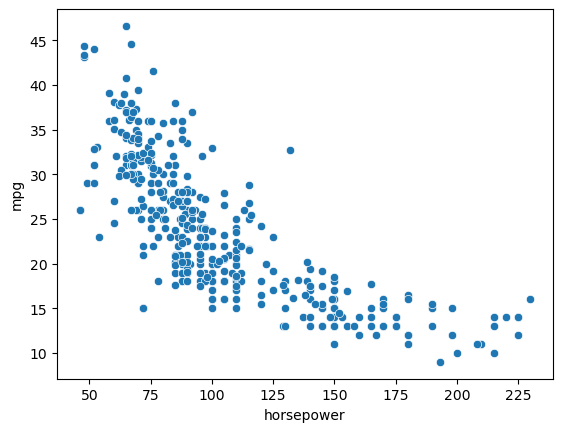

In [127]:
sns.scatterplot(x='horsepower',y='mpg',data=df_Auto)


<Axes: xlabel='horsepower', ylabel='mpg'>

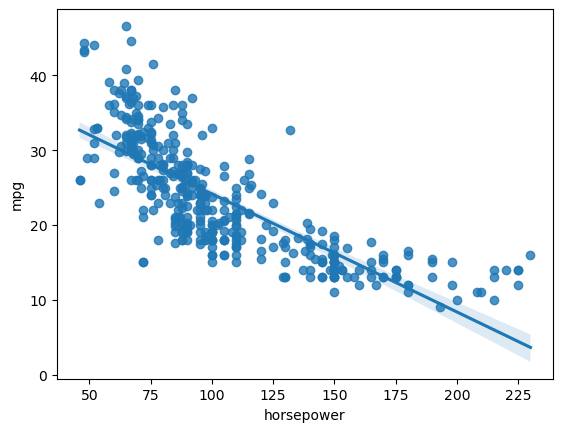

In [129]:
sns.regplot(x='horsepower',y='mpg',data=df_Auto)

In [133]:
y = df_Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        23:01:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

In [137]:

# Define predictor and response
X = df_Auto["horsepower"]
y = df_Auto["mpg"]

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        23:01:14   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0



R squared(0.606) means that 60.6 percent of the variance in mpg is explained by horsepower. This indicates a moderately strong relationship.
Adusted R-squared(0.605) is adjusted for the number of predictors, it is very close to R squared, meaning adding more variables would not significantly change the model.

Intercept (39.94): Means when horsepower is 0, the predicted mpg is 39.94.

Horsepower (-0.1578): For each additional unit of horsepower, the mpg decreases by 0.1578.Since this coefficient is negative, the relationship is inverse implying that higher horsepower leads to lower fuel efficiency.

P-values (< 0.05): Both coefficients are highly significant and is strong evidence that horsepower affects mpg.



In [161]:
import numpy as np
import pandas as pd

# Create new observation with horsepower = 98, including intercept term
X_new = pd.DataFrame({"const": [1], "horsepower": [98]})

# Get predictions
prediction = model.get_prediction(X_new)

# Print confidence and prediction intervals
prediction.summary_frame(alpha=0.05)



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Interpretation: 
A car with 98 horsepower is expected to have 24.47 mpg(mean) on average as Predicted mpg.

The mean mpg for cars with 98 horsepower is most likely between 23.97 and 24.96.

Predicted mpg for Horsepower = 98 at 95 % confidence(alpha - 0.05)

So, for a car with 98 horsepower, the predicted fuel efficiency is 24.47 mpg.


In [174]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_2393/991214615.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_2393/991214615.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


TypeError: abline() got an unexpected keyword argument 'linewidth'

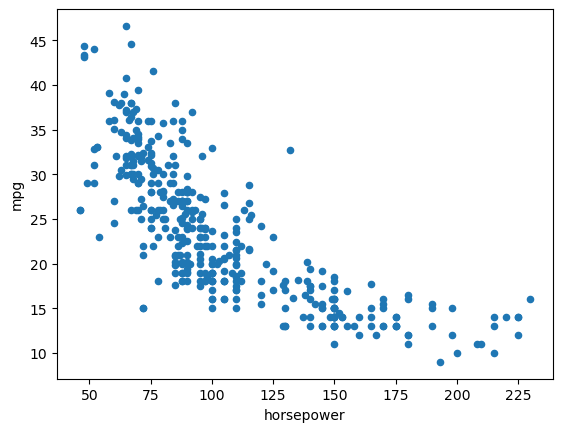

In [176]:
ax = df_Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

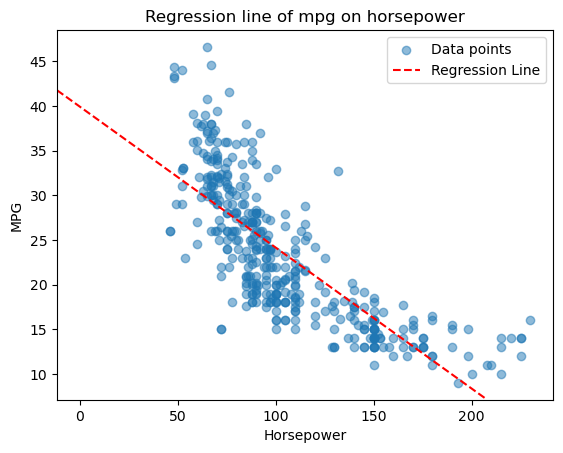

In [181]:
import matplotlib.pyplot as plt

# scatter plot
fig, ax = plt.subplots()
ax.scatter(df_Auto["horsepower"], df_Auto["mpg"], alpha=0.5, label="Data points")

# regression line using ax.axline()
slope = model.params["horsepower"]
intercept = model.params["const"]
ax.axline((0, intercept), slope=slope, color='red', linestyle='--', label="Regression Line")

# Labels, title
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("Regression line of mpg on horsepower")
ax.legend()
plt.show()


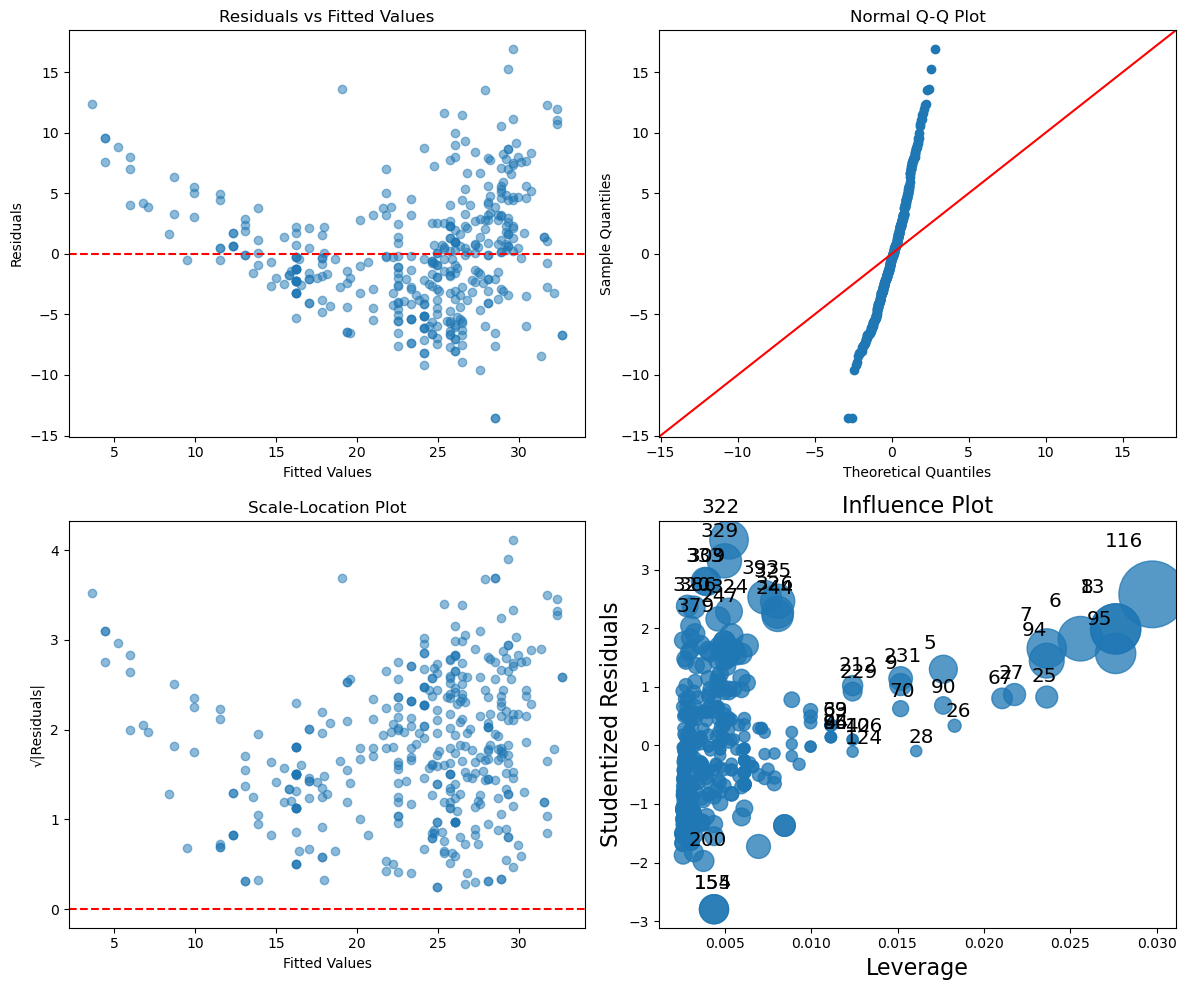

In [84]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

## 1. Residuals vs Fitted Values Plot
axes[0, 0].scatter(fitted_values, residuals, alpha=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_title("Residuals vs Fitted Values")

## 2. Normal Q-Q Plot
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title("Normal Q-Q Plot")

## 3. Scale-Location Plot
axes[1, 0].scatter(fitted_values, np.sqrt(np.abs(residuals)), alpha=0.5)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("√|Residuals|")
axes[1, 0].set_title("Scale-Location Plot")

## 4. Residuals vs Leverage Plot
sm.graphics.influence_plot(model, ax=axes[1, 1], criterion="cooks")

# Display plots
plt.tight_layout()
plt.show()


Residuals plot shows a pattern meaning the relationship between the predictor (horsepower) and response (mpg) may not be purely linear.
The Scale Location Plot suggests non constant variance of residuals,showing no homoscedasticity.
The Normal Q Q Plot shows deviations from normality, indicating that the residuals are not normally distributed.
The Influence Plot identifies potential outliers that may distort the regression results.
